In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\arkap\Downloads\Bank Nifty project.csv")

In [3]:
df

,Index Name,Date,Open,High,Low,Close
0,NIFTY BANK,16 Jun 2025,55554.10,55999.85,55381.45,55944.90
1,NIFTY BANK,13 Jun 2025,55149.30,55688.00,55149.30,55527.35
2,NIFTY BANK,12 Jun 2025,56480.90,56611.05,55968.50,56082.55
3,NIFTY BANK,11 Jun 2025,56639.85,56782.50,56399.40,56459.75
4,NIFTY BANK,10 Jun 2025,56993.90,57015.40,56564.15,56629.10
...,...,...,...,...,...,...
2473,NIFTY BANK,22 Jun 2015,17956.55,18420.95,17950.60,18334.50
2474,NIFTY BANK,19 Jun 2015,17758.95,17935.30,17730.70,17880.85
2475,NIFTY BANK,18 Jun 2015,17661.90,17797.35,17630.65,17733.55
2476,NIFTY BANK,17 Jun 2015,17681.20,17692.55,17533.45,17584.05


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index Name  2478 non-null   object 
 1   Date        2478 non-null   object 
 2   Open        2478 non-null   float64
 3   High        2478 non-null   float64
 4   Low         2478 non-null   float64
 5   Close       2478 non-null   float64
dtypes: float64(4), object(2)
memory usage: 116.3+ KB


In [5]:
df.isnull().sum()

Index Name    0
Date          0
Open          0
High          0
Low           0
Close         0
dtype: int64

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [11]:
df.set_index('Date',inplace=True)
df['Date']=df.index

In [12]:
df.dtypes

Index Name            object
Open                 float64
High                 float64
Low                  float64
Close                float64
Date          datetime64[ns]
dtype: object

In [13]:
df.index

DatetimeIndex(['2025-06-16', '2025-06-13', '2025-06-12', '2025-06-11',
               '2025-06-10', '2025-06-09', '2025-06-06', '2025-06-05',
               '2025-06-04', '2025-06-03',
               ...
               '2015-06-29', '2015-06-26', '2015-06-25', '2015-06-24',
               '2015-06-23', '2015-06-22', '2015-06-19', '2015-06-18',
               '2015-06-17', '2015-06-16'],
              dtype='datetime64[ns]', name='Date', length=2478, freq=None)

In [30]:
df1=df.drop(axis=1,labels=['Index Name','Open','High','Low','Date'])
DF=df1.reset_index()
DF1=DF.drop(axis=1,labels=['Date'])
DF1

,Close
0,55944.90
1,55527.35
2,56082.55
3,56459.75
4,56629.10
...,...
2473,18334.50
2474,17880.85
2475,17733.55
2476,17584.05


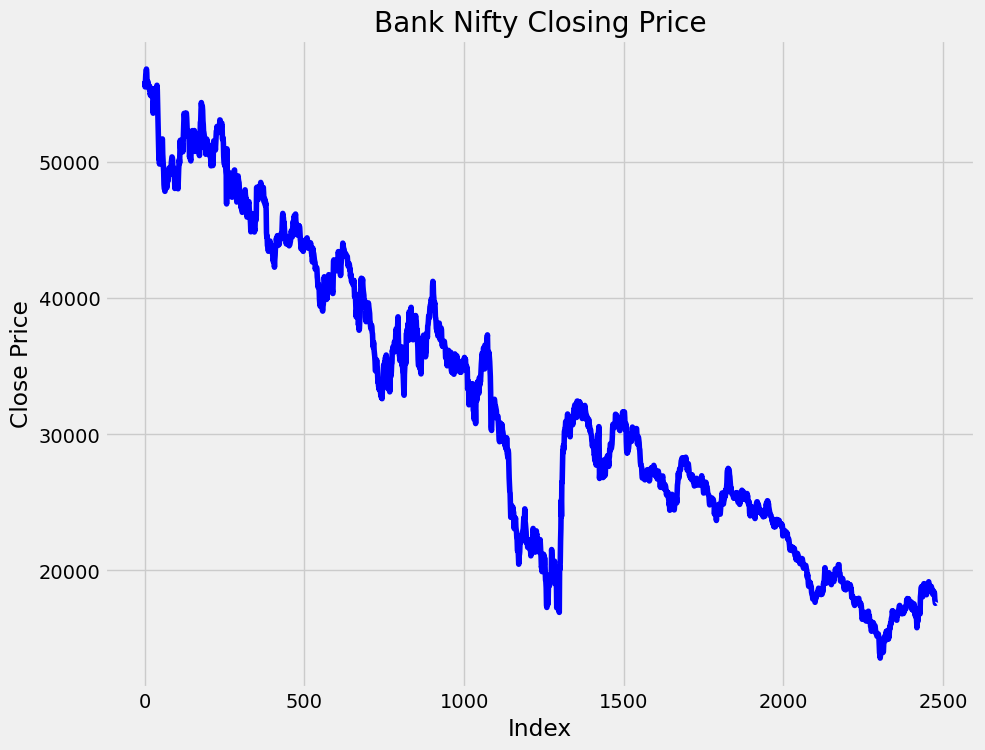

In [31]:
plt.figure(figsize=(10,8))
plt.grid(True)
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.plot(DF1['Close'],color="Blue")
plt.title('Bank Nifty Closing Price')
plt.tick_params(axis='x',labelsize=14)
plt.tick_params(axis='y',labelsize=14)
plt.style.use('fivethirtyeight')

plt.show()

In [32]:
monthly_data = pd.read_csv(r"C:\Users\arkap\Downloads\Bank Nifty project.csv")

#convert 'Date' to datetime and extract Year
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])
monthly_data['Year'] = monthly_data['Date'].dt.year

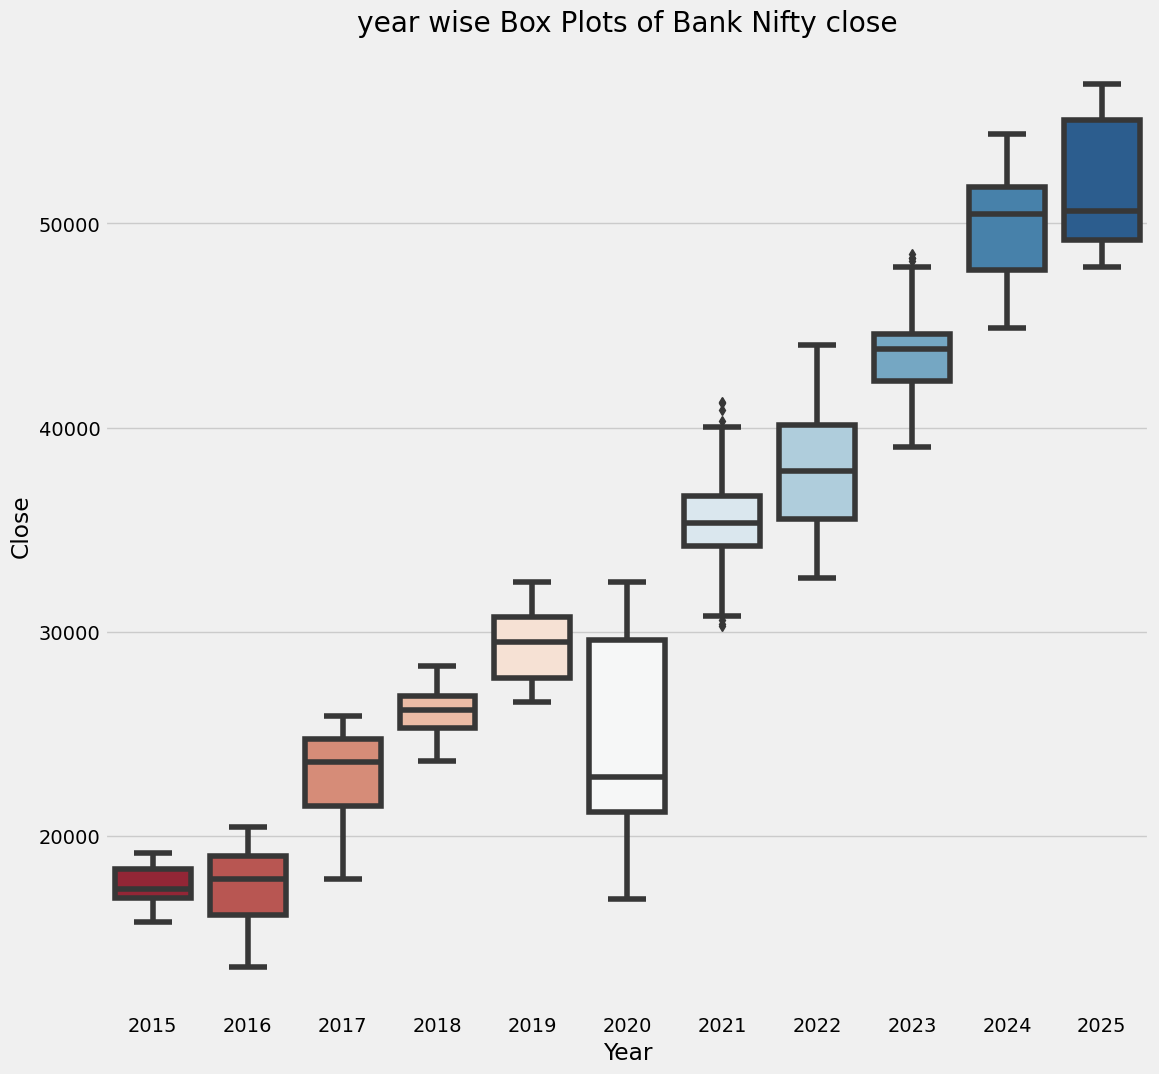

In [33]:
plt.figure(figsize=(12,12))
ax=sns.boxplot(x=monthly_data['Year'],y=monthly_data['Close'],palette='RdBu')
ax.set_title('year wise Box Plots of Bank Nifty close')
plt.tick_params(axis='x',labelsize=14)
plt.tick_params(axis='y',labelsize=14)
plt.style.context('fivethirtyeight')

plt.show()



<Figure size 1200x1200 with 0 Axes>

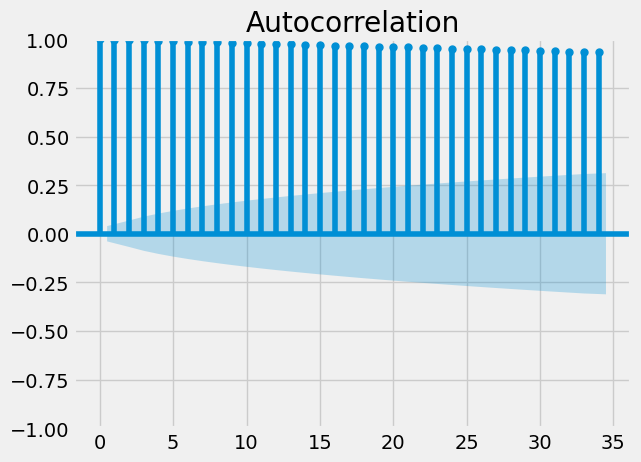

In [34]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,12))
plot_acf(DF1['Close'].dropna())
plt.tick_params(axis='x',labelsize=14)
plt.tick_params(axis='y',labelsize=14)
plt.show()


<Figure size 1200x1200 with 0 Axes>

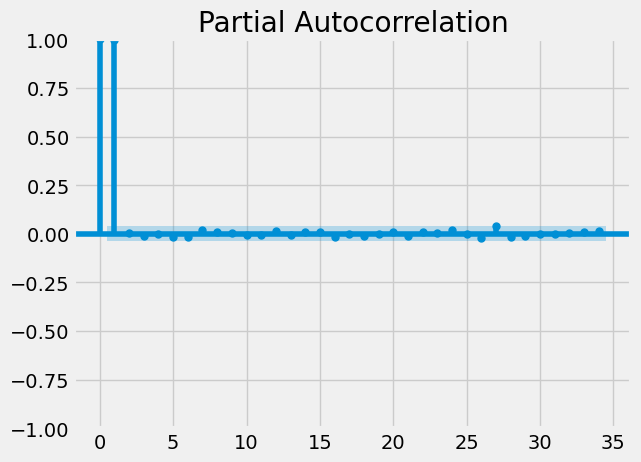

In [35]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,12))
plot_pacf(DF1['Close'].dropna())
plt.tick_params(axis='x',labelsize=14)
plt.tick_params(axis='y',labelsize=14)
plt.show()

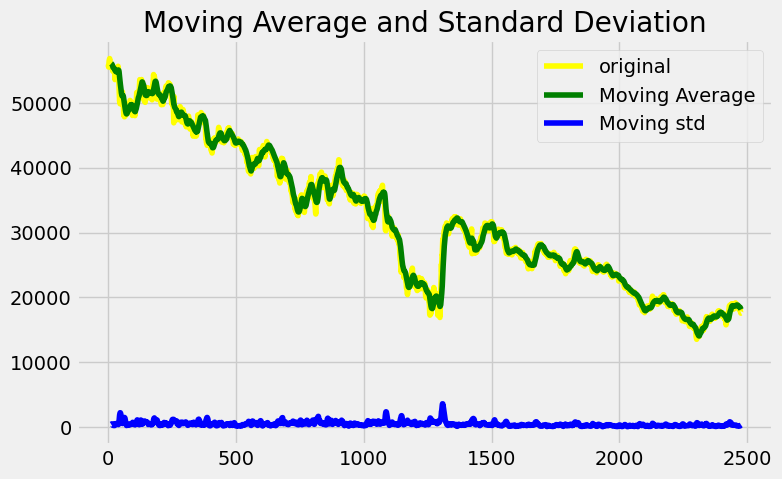

Results of Dickey Fuller Test
Test Statistics               -1.805116
P-value                        0.377925
No. of lags used               6.000000
No. of observations used    2471.000000
critical value (1%)           -3.432999
critical value (5%)           -2.862710
critical value (10%)          -2.567393
dtype: float64


In [36]:
def test_stationarity(timeseries):
    plt.figure(figsize=(8,5))
    plt.grid(True)
    plt.tick_params(axis='x',labelsize=14)
    plt.tick_params(axis='y',labelsize=14)
    #Determing Rolling Statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics
    plt.plot(timeseries,color='yellow',label='original')
    plt.plot(rolmean,color='green',label='Moving Average')
    plt.plot(rolstd,color='blue',label='Moving std')
    plt.legend(loc='best')
    plt.title('Moving Average and Standard Deviation')
    plt.show(block=False)
    print("Results of Dickey Fuller Test")
    from statsmodels.tsa.stattools import adfuller
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','P-value','No. of lags used','No. of observations used'])
    for key ,values in adft[4].items():
        output['critical value (%s)'%key] = values
    print(output)

test_stationarity(DF1['Close'])

<Axes: >

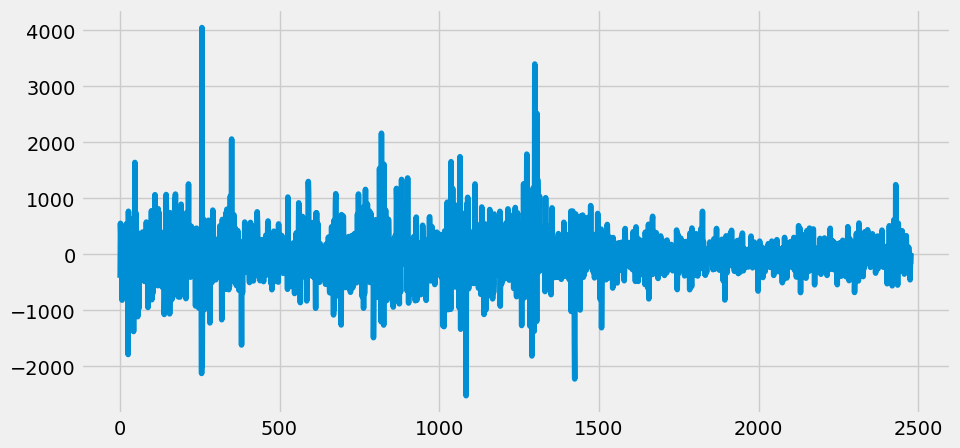

In [37]:
DF1['Close'] = DF1['Close'] - DF1['Close'].shift(1)
plt.figure(figsize=(10,5))
plt.tick_params(axis='x',labelsize=14)
plt.tick_params(axis='y',labelsize=14)
DF1['Close'].dropna().plot()

<Figure size 1200x1200 with 0 Axes>

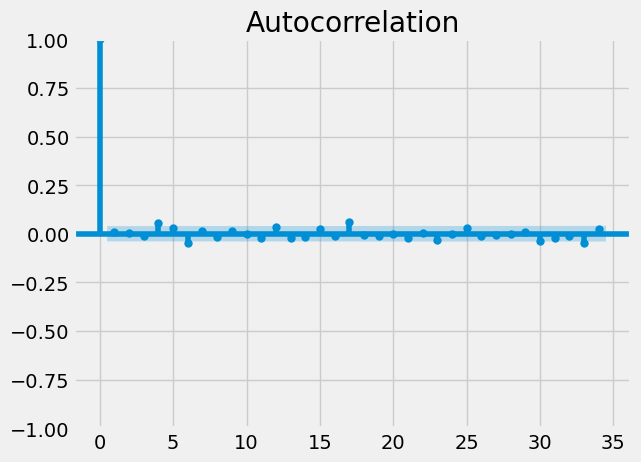

In [38]:
plt.figure(figsize=(12,12))
plot_acf(DF1['Close'].dropna())
plt.tick_params(axis='x',labelsize=14)
plt.tick_params(axis='y',labelsize=14)
plt.show()

<Figure size 1200x1200 with 0 Axes>

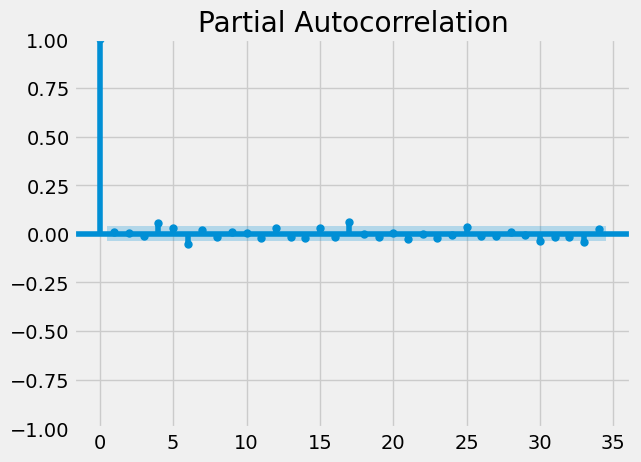

In [39]:
plt.figure(figsize=(12,12))
plot_pacf(DF1['Close'].dropna())
plt.tick_params(axis='x',labelsize=14)
plt.tick_params(axis='y',labelsize=14)
plt.show()

In [28]:
DF1['Close'] = DF1['Close'] - DF1['Close'].shift(1)

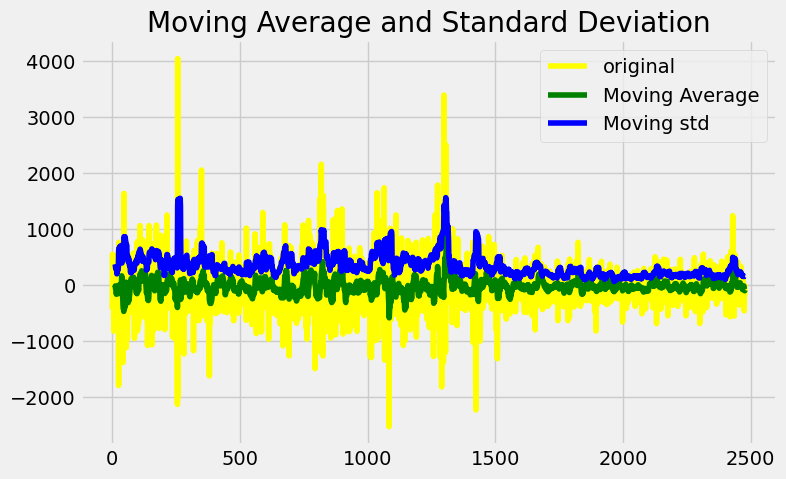

Results of Dickey Fuller Test
Test Statistics              -20.145852
P-value                        0.000000
No. of lags used               5.000000
No. of observations used    2471.000000
critical value (1%)           -3.432999
critical value (5%)           -2.862710
critical value (10%)          -2.567393
dtype: float64


In [41]:
def test_stationarity(timeseries):
    plt.figure(figsize=(8,5))
    plt.grid(True)
    plt.tick_params(axis='x',labelsize=14)
    plt.tick_params(axis='y',labelsize=14)
    #Determing Rolling Statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics
    plt.plot(timeseries,color='yellow',label='original')
    plt.plot(rolmean,color='green',label='Moving Average')
    plt.plot(rolstd,color='blue',label='Moving std')
    plt.legend(loc='best')
    plt.title('Moving Average and Standard Deviation')
    plt.show(block=False)
    print("Results of Dickey Fuller Test")
    from statsmodels.tsa.stattools import adfuller
    adft = adfuller(timeseries.dropna(), autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','P-value','No. of lags used','No. of observations used'])
    for key ,values in adft[4].items():
        output['critical value (%s)'%key] = values
    print(output)

test_stationarity(DF1['Close'])

In [53]:
df = pd.read_csv(r"C:\Users\arkap\Downloads\Bank Nifty project.csv")

In [56]:
# Convert 'Date' column to datetime and sort in ascending order
df['Date'] = pd.to_datetime(df['Date'])

In [57]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%b-%d')
df.sort_values('Date', inplace=True)

In [58]:
# Create a new DataFrame with only Date and Close
df_filtered = df[['Date', 'Close']].reset_index(drop=True)

In [65]:
# Train-test split (70% train, 30% test)
split_idx = int(len(df_filtered) * 0.7)
train_df = df_filtered.iloc[:split_idx]
test_df = df_filtered.iloc[split_idx:]


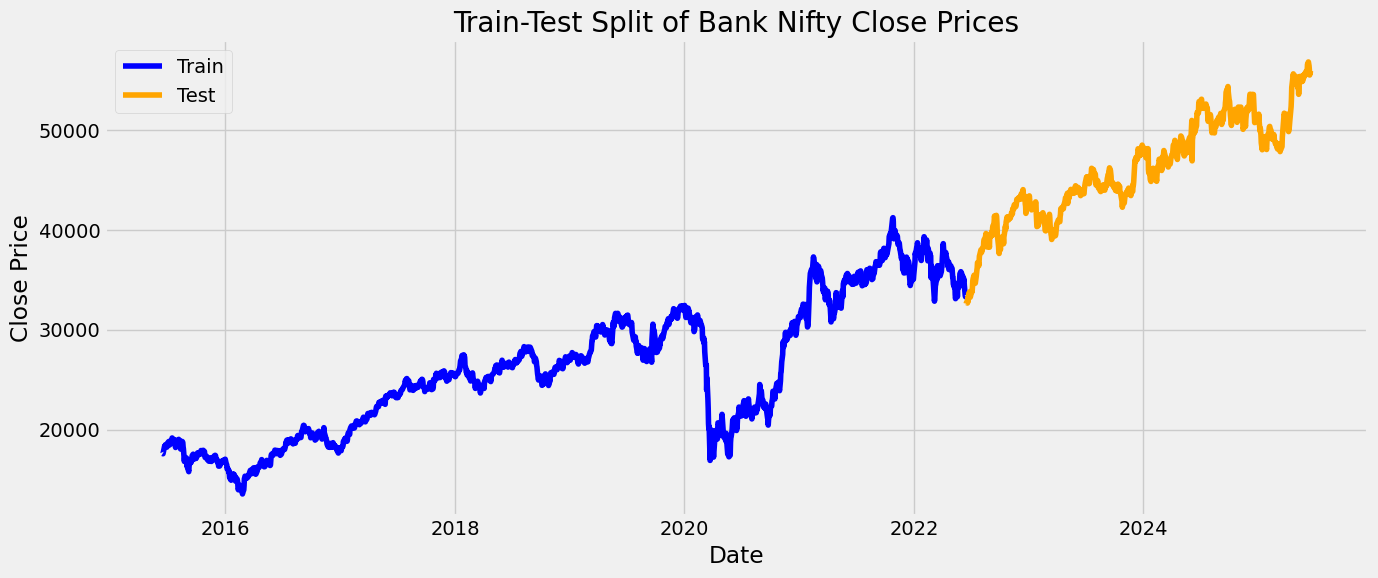

In [66]:
# Plotting
plt.figure(figsize=(14, 6))
plt.plot(train_df['Date'], train_df['Close'], label='Train', color='blue')
plt.plot(test_df['Date'], test_df['Close'], label='Test', color='orange')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Train-Test Split of Bank Nifty Close Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
!pip install pmdarima


   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   --------- ------------------------------ 153.6/614.7 kB 3.1 MB/s eta 0:00:01
   --------------------------- ------------ 430.1/614.7 kB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.2/2.7 MB 4.7 MB/s eta 0:00:01
   ------- -------------------------------- 0.5/2.7 MB 5.0 MB/s eta 0:00:01
   ---------- ----------------------------- 0.7/2.7 MB 5.1 MB/s eta 0:00:01
   -------------- ------------------------- 1.0/2.7 MB 5.1 MB/s eta 0:00:01
   ------------------ --------------------- 1.2/2.7 MB 5.3 MB/s eta 0:00:01
   ---------------------- ----------------- 1.5/2.7 MB 5.2 MB/s eta 0:00:01
   -------------------------- ------------- 1.8/2.7 MB 5.3 MB/s eta 0:00:01
   ----------------------------- ---------- 2.0/2.7 MB 5.3 MB/s eta 0:00:01
   ---------

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25599.025, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25597.597, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25597.431, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25597.965, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=25599.118, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=25598.694, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=25600.574, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=25596.277, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=25597.946, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=25597.581, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=25596.445, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=25599.179, Time=0.19 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.230 seconds
                               SARIMAX Results                              

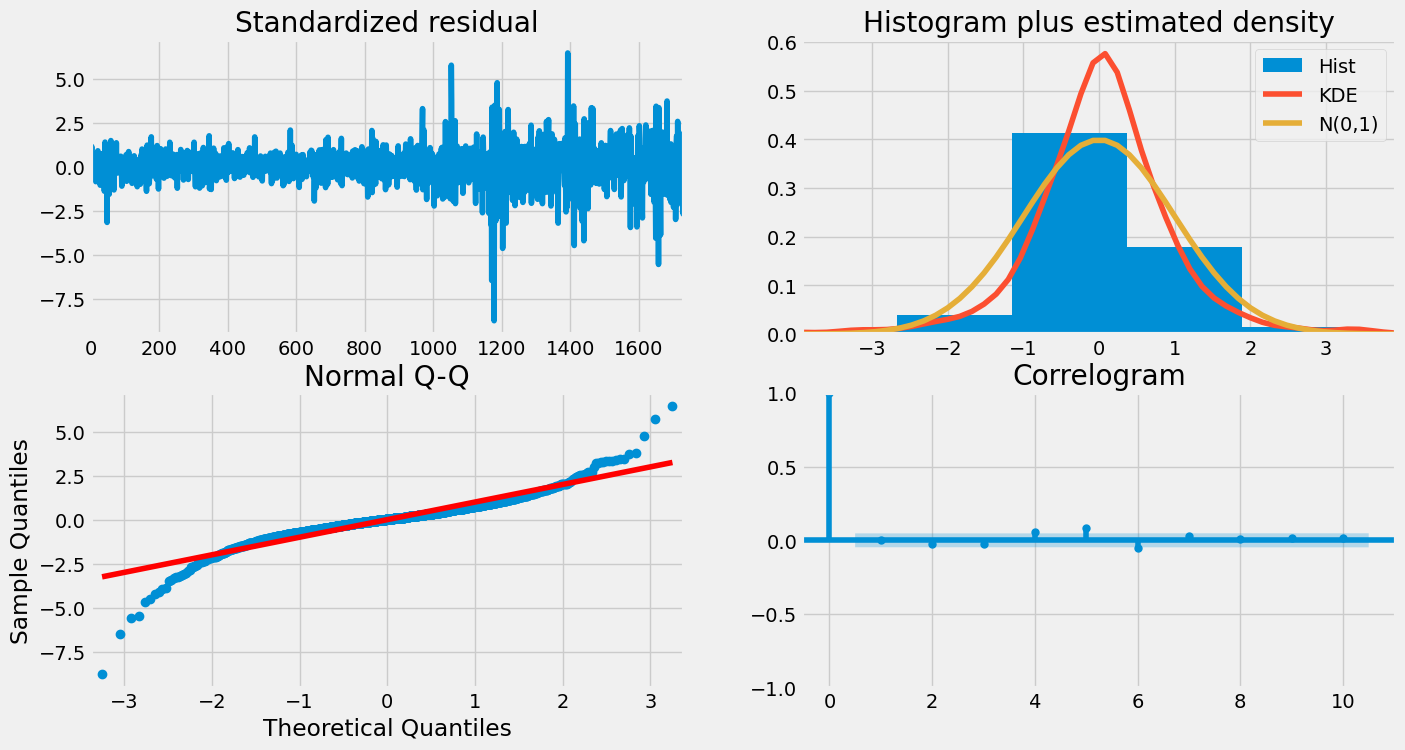

In [73]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(train_df['Close'],start_p=0,start_q=0,
                      test='adf',
                      max_p=3,max_q=3,
                      m=1,       
                      d=None,      
                      seasonal=False,      
                      start_P=0,      
                      D=0,      
                      trace=True,      
                      error_action='ignore',
                      supress_warnings=True,       
                      stepwise=True)      
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()                

In [74]:
import warnings 
import statsmodels.api as sm
warnings.filterwarnings('ignore','statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)
model=sm.tsa.arima.ARIMA(DF1,order=(0,1,1))
fitted=model.fit()

print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2478
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -18431.607
Date:                Tue, 17 Jun 2025   AIC                          36867.213
Time:                        21:28:40   BIC                          36878.843
Sample:                             0   HQIC                         36871.437
                               - 2478                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9992      0.004   -260.378      0.000      -1.007      -0.992
sigma2      1.692e+05   2156.676     78.431      0.000    1.65e+05    1.73e+05
Ljung-Box (L1) (Q):                   0.32   Jarque-

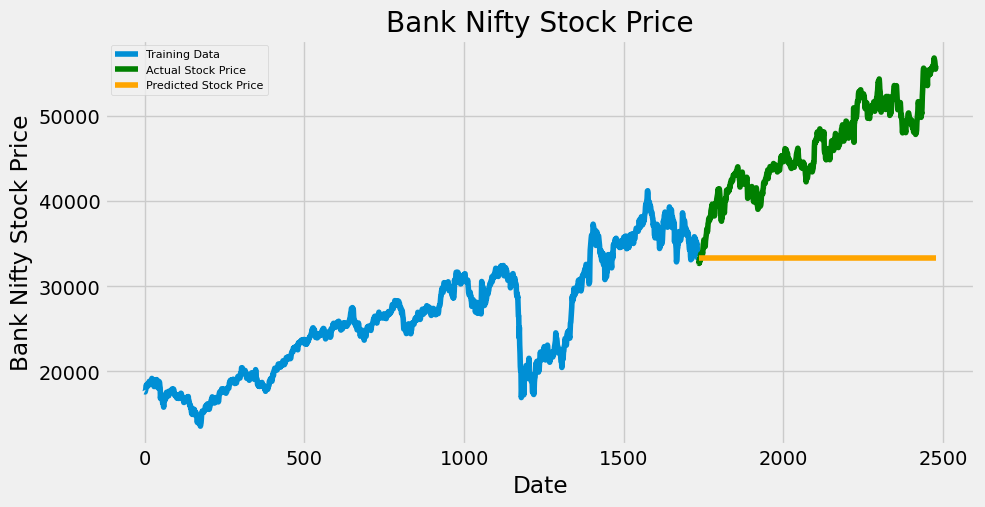

In [89]:
model=sm.tsa.arima.ARIMA(train_df['Close'],order=(0,1,1))
fitted=model.fit()
# Get forecast and confidence interval
fc, confint = model_autoARIMA.predict(n_periods=744, return_conf_int=True)

# Convert to Series
fc_series = pd.Series(fc, index=test_df.index)
lower_series = pd.Series(confint[:, 0], index=test_df.index)
upper_series = pd.Series(confint[:, 1], index=test_df.index)

#plot
plt.figure(figsize=(10,5))
plt.plot(train_df['Close'],label='Training Data')
plt.plot(test_df['Close'],color='green',label='Actual Stock Price')
plt.plot(fc_series,color='orange',label='Predicted Stock Price')
#plt.fill_between(lower_series.index,lower_series,upper_series,color='k',alpha=0.10)
plt.title('Bank Nifty Stock Price')
plt.xlabel('Date')
plt.ylabel('Bank Nifty Stock Price')
plt.legend(loc='upper left',fontsize=8)
plt.show()

In [90]:
print("Forecasted Values:\n", fc_series.head(10))


Forecasted Values:
 1734    33340.389634
1735    33340.389634
1736    33340.389634
1737    33340.389634
1738    33340.389634
1739    33340.389634
1740    33340.389634
1741    33340.389634
1742    33340.389634
1743    33340.389634
dtype: float64


In [91]:
print("Summary Statistics of Forecasted Values:")
print(fc_series.describe())


Summary Statistics of Forecasted Values:
count    7.440000e+02
mean     3.334039e+04
std      1.820213e-10
min      3.334039e+04
25%      3.334039e+04
50%      3.334039e+04
75%      3.334039e+04
max      3.334039e+04
dtype: float64


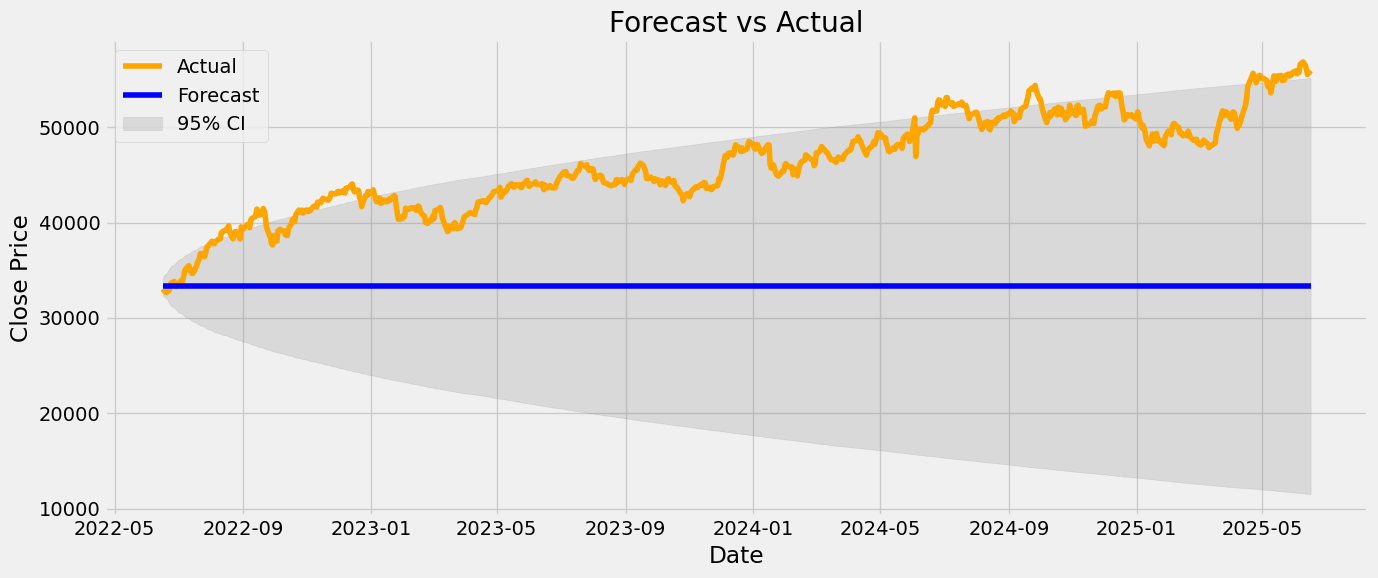

In [92]:
plt.figure(figsize=(14, 6))
plt.plot(test_df['Date'], test_df['Close'], label='Actual', color='orange')
plt.plot(test_df['Date'], fc_series, label='Forecast', color='blue')
plt.fill_between(test_df['Date'], lower_series, upper_series, color='gray', alpha=0.2, label='95% CI')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [93]:
comparison_df = pd.DataFrame({
    'Actual': test_df['Close'],
    'Forecast': fc_series,
    'Lower_CI': lower_series,
    'Upper_CI': upper_series
})

print(comparison_df.head(10))


        Actual      Forecast      Lower_CI      Upper_CI
1734  32617.10  33340.389634  32576.458986  34104.320282
1735  32743.05  33340.389634  32234.529648  34446.249620
1736  32684.80  33340.389634  31975.742213  34705.037055
1737  33191.75  33340.389634  31758.745281  34922.033987
1738  32845.30  33340.389634  31568.121276  35112.657993
1739  33135.00  33340.389634  31396.097627  35284.681641
1740  33627.45  33340.389634  31238.103335  35442.675933
1741  33811.25  33340.389634  31091.180004  35589.599264
1742  33642.45  33340.389634  30953.282549  35727.496719
1743  33269.90  33340.389634  30822.927319  35857.851949


In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_df['Close'], fc_series)
rmse = mean_squared_error(test_df['Close'], fc_series, squared=False)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 12800.87
RMSE: 13779.01


In [11]:
# Calculate returns (log or simple return)
df_filtered['Returns'] = df_filtered['Close'].pct_change()  # simple returns
# or use log returns if preferred:
# df_filtered['Returns'] = np.log(df_filtered['Close'] / df_filtered['Close'].shift(1))

# Drop NaN from first row
returns = df_filtered['Returns'].dropna()


NameError: name 'df_filtered' is not defined

In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(0, 0, 2) model
model = ARIMA(returns, order=(0, 0, 2))
model_fit = model.fit()

# Print summary
print(model_fit.summary())


C:\Users\arkap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\arkap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\arkap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Return   No. Observations:                 2477
Model:                 ARIMA(0, 0, 2)   Log Likelihood                7076.638
Date:                Sun, 22 Jun 2025   AIC                         -14145.276
Time:                        20:04:15   BIC                         -14122.017
Sample:                             0   HQIC                        -14136.828
                               - 2477                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.907      0.056   -1.55e-05       0.001
ma.L1          0.0232      0.012      1.983      0.047       0.000       0.046
ma.L2         -0.0112      0.009     -1.266      0.2

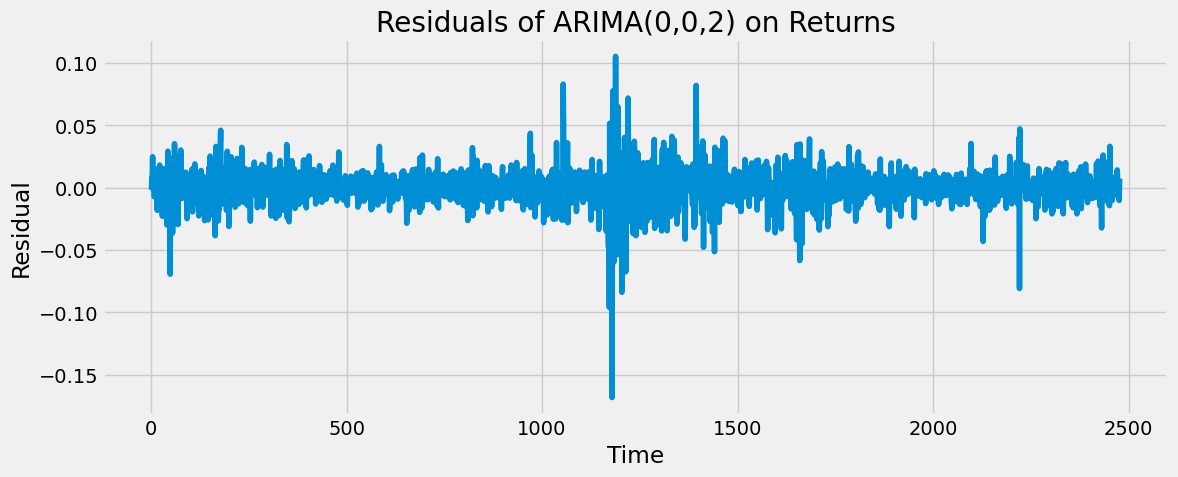

In [97]:
# Get residuals
residuals = model_fit.resid

# Plot residuals
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(residuals)
plt.title('Residuals of ARIMA(0,0,2) on Returns')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.grid(True)
plt.tight_layout()
plt.show()


In [98]:
pip install arch


   ---------------------------------------- 0.0/927.1 kB ? eta -:--:--
   ---- ----------------------------------- 112.6/927.1 kB 3.3 MB/s eta 0:00:01
   --------------- ------------------------ 358.4/927.1 kB 4.5 MB/s eta 0:00:01
   -------------------------- ------------- 624.6/927.1 kB 4.9 MB/s eta 0:00:01
   ------------------------------------- -- 870.4/927.1 kB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 927.1/927.1 kB 4.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [102]:
from statsmodels.stats.diagnostic import het_arch

# Apply LM test on residuals
lm_test = het_arch(residuals, nlags=6)  # try different lags like 5, 10, etc.

# Unpack results
lm_stat, lm_pvalue, f_stat, f_pvalue = lm_test

print(f"Lagrange Multiplier (LM) stat: {lm_stat:.4f}")
print(f"LM p-value: {lm_pvalue:.4f}")
print(f"F-statistic: {f_stat:.4f}")
print(f"F-test p-value: {f_pvalue:.4f}")


Lagrange Multiplier (LM) stat: 352.2041
LM p-value: 0.0000
F-statistic: 68.2645
F-test p-value: 0.0000


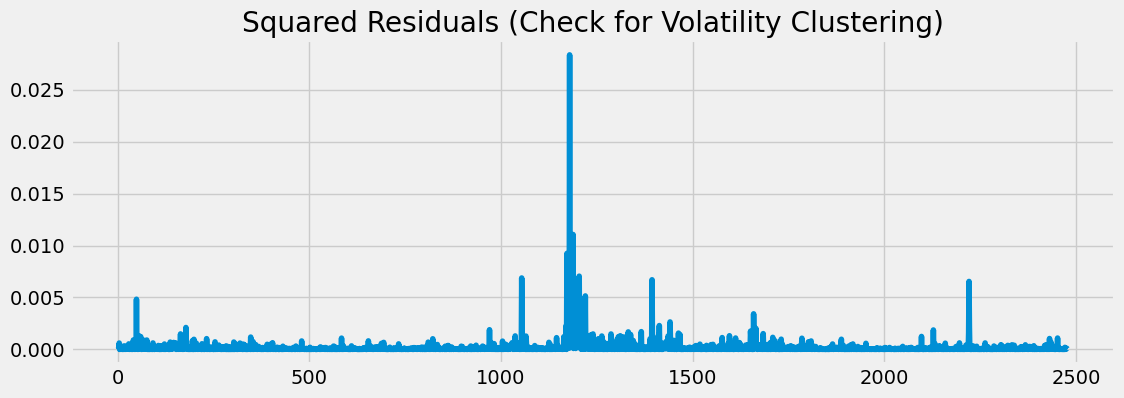

In [103]:
plt.figure(figsize=(12, 4))
plt.plot(residuals**2)
plt.title("Squared Residuals (Check for Volatility Clustering)")
plt.grid(True)
plt.show()


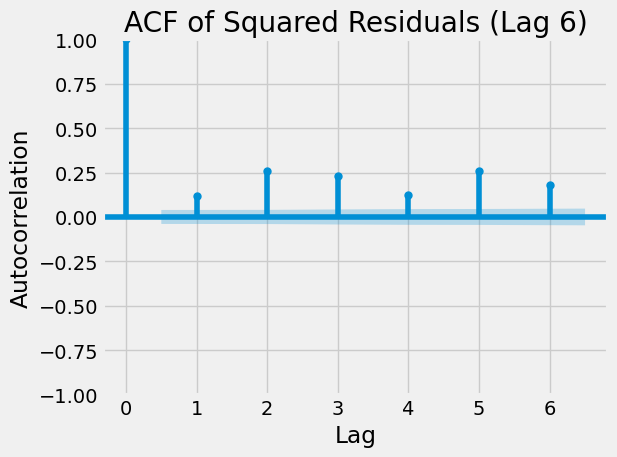

In [104]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Square the residuals
squared_residuals = residuals**2

# Plot ACF of squared residuals up to lag 2
plot_acf(squared_residuals, lags=6, alpha=0.05)
plt.title("ACF of Squared Residuals (Lag 6)")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.tight_layout()
plt.show()


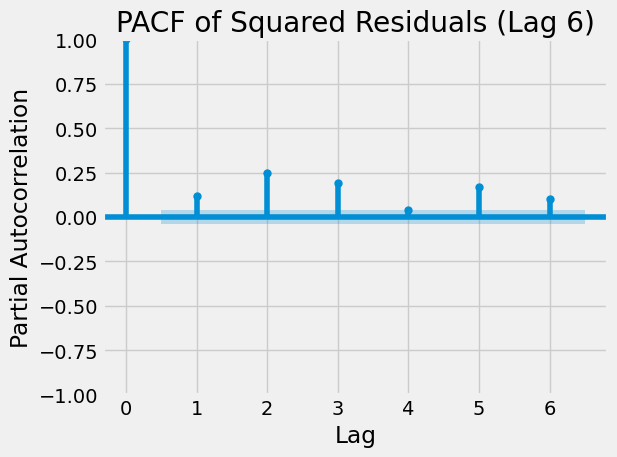

In [105]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF of squared residuals
plot_pacf(squared_residuals, lags=6, alpha=0.05, method='ywm')
plt.title("PACF of Squared Residuals (Lag 6)")
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
# Install necessary packages if not already installed
# pip install pandas matplotlib statsmodels pmdarima arch

import pandas as pd
import statsmodels.api as sm
from arch import arch_model
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"C:\Users\arkap\Downloads\Bank Nifty project.csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')

df.set_index('Date', inplace=True)



In [2]:
# Calculate returns
df['Return'] = df['Close'].pct_change()
returns = df['Return'].dropna()




In [3]:
# Auto ARIMA to determine best (p,d,q)
auto_model = auto_arima(returns, seasonal=False, stepwise=True, suppress_warnings=True, max_order=5)
print("Best ARIMA order:", auto_model.order)


Best ARIMA order: (0, 0, 0)


In [4]:
# Fit ARIMA model
arima_model = sm.tsa.ARIMA(returns, order=auto_model.order).fit()
residuals = arima_model.resid

C:\Users\arkap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\arkap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\arkap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [5]:
# Fit ARCH(1) model
arch_mod = arch_model(residuals, vol='ARCH', p=1)
arch_result = arch_mod.fit()
print(arch_result.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 33766106427.13344
Iteration:      2,   Func. Count:     16,   Neg. LLF: 768894231.8338449
Iteration:      3,   Func. Count:     27,   Neg. LLF: -1797.4975570060653
Iteration:      4,   Func. Count:     35,   Neg. LLF: 911283.4351407352
Iteration:      5,   Func. Count:     43,   Neg. LLF: -4777.5744237875715
Iteration:      6,   Func. Count:     50,   Neg. LLF: 963.6514876856762
Iteration:      7,   Func. Count:     58,   Neg. LLF: -7136.7244190467945
Iteration:      8,   Func. Count:     63,   Neg. LLF: -7200.004216970702
Iteration:      9,   Func. Count:     68,   Neg. LLF: -7035.510837931333
Iteration:     10,   Func. Count:     73,   Neg. LLF: -7200.989142604505
Iteration:     11,   Func. Count:     77,   Neg. LLF: -7200.98930013571
Iteration:     12,   Func. Count:     80,   Neg. LLF: -7200.989300135552
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7200.98930013571
            Iterat

C:\Users\arkap\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001934. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


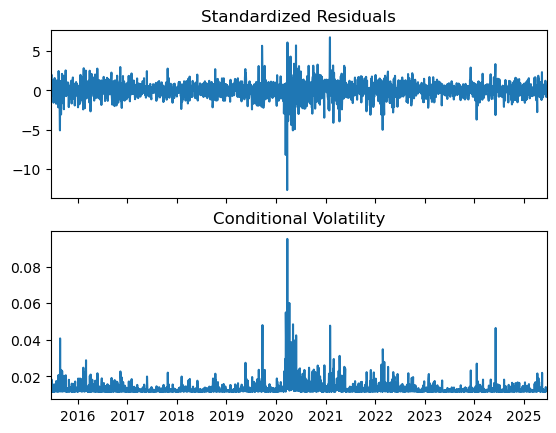

In [35]:
# Plot volatility
arch_result.plot()
plt.show()

In [8]:
from arch import arch_model

garch_model = arch_model(residuals, vol='GARCH', p=1, q=1)
garch_result = garch_model.fit()
print(garch_result.summary())


Iteration:      1,   Func. Count:      6,   Neg. LLF: 13558246769.530647
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1418514630.3995838
Iteration:      3,   Func. Count:     28,   Neg. LLF: 1058616.3149895747
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7517.256746918818
            Iterations: 3
            Function evaluations: 36
            Gradient evaluations: 3
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                7517.26
Distribution:                  Normal   AIC:                          -15026.5
Method:            Maximum Likelihood   BIC:                          -15003.3
                                        No. Observations:                 2477
Date:               

C:\Users\arkap\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001934. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


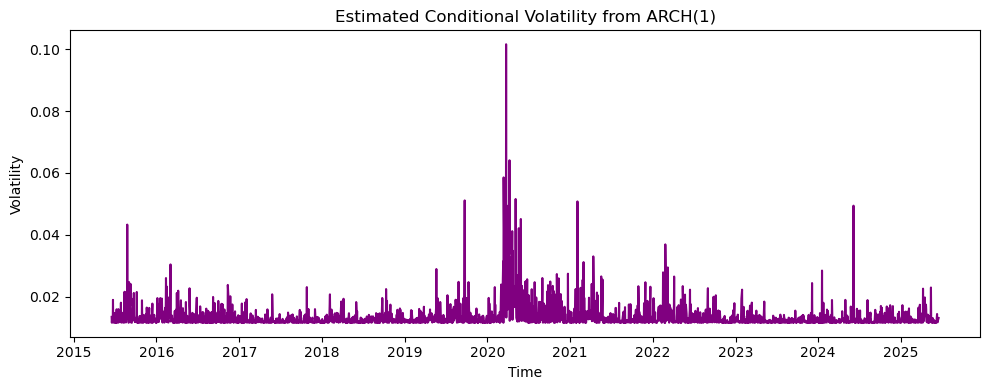

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(arch_result.conditional_volatility, color='purple')
plt.title("Estimated Conditional Volatility from ARCH(1)")
plt.ylabel("Volatility")
plt.xlabel("Time")
plt.tight_layout()
plt.show()


In [15]:
#ACF and PACF code for arima(0,0,0)

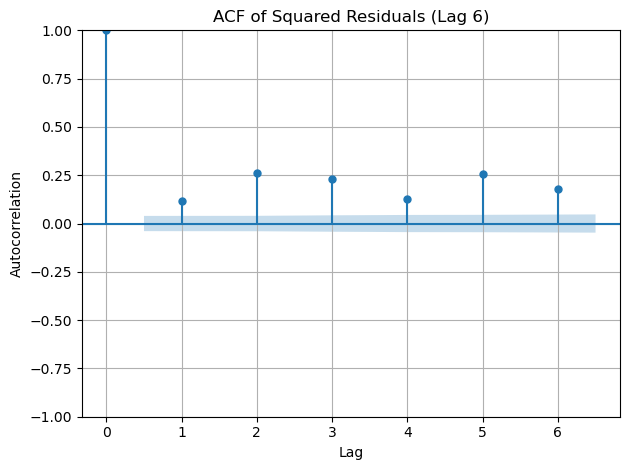

In [6]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Square the residuals
squared_residuals = residuals**2

# Plot ACF of squared residuals up to lag 2
plot_acf(squared_residuals, lags=6, alpha=0.05)
plt.title("ACF of Squared Residuals (Lag 6)")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.tight_layout()
plt.show()

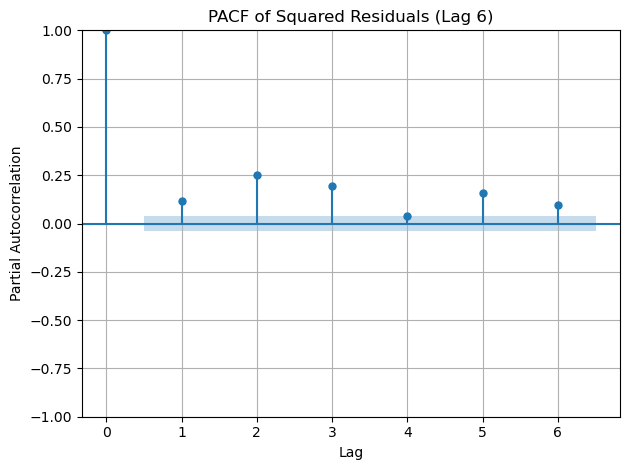

In [7]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF of squared residuals
plot_pacf(squared_residuals, lags=6, alpha=0.05, method='ywm')
plt.title("PACF of Squared Residuals (Lag 6)")
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
#ACF and PACF code for GARCH(1,1)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 13558246769.530647
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1418514630.3995838
Iteration:      3,   Func. Count:     28,   Neg. LLF: 1058616.3149895747
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7517.256746918818
            Iterations: 3
            Function evaluations: 36
            Gradient evaluations: 3


C:\Users\arkap\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001934. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


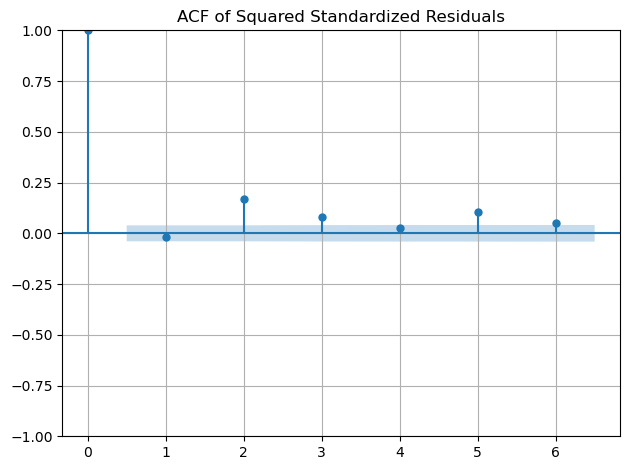

In [14]:
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
garch_model = arch_model(residuals, vol='GARCH', p=1, q=1)
garch_result = garch_model.fit()

# Get standardized residuals
std_resid = residuals / arch_result.conditional_volatility
squared_resid = std_resid ** 2

# Plot ACF & PACF of squared residuals
plot_acf(squared_resid, lags=6)
plt.title('ACF of Squared Standardized Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()




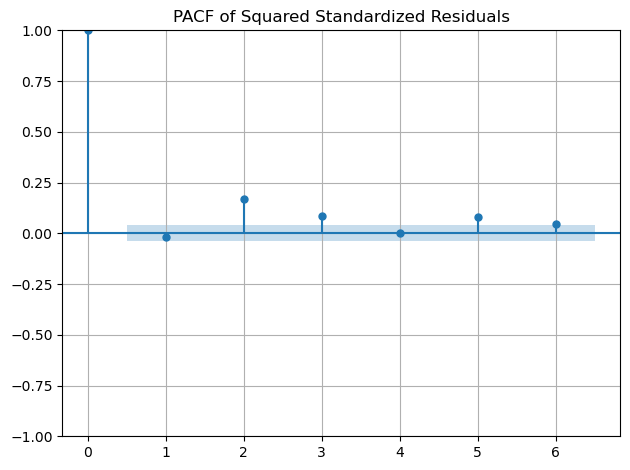

In [13]:
plot_pacf(squared_resid, lags=6)
plt.title('PACF of Squared Standardized Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()